## Problem Statement

### Problem 1: Prediction task is to determine whether a person makes over 50K a year.

The description of the dataset is as follows:
Data Set Information: Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions:

((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
Attribute Information: Listing of attributes:

50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof- specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,

Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
%matplotlib inline
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics import precision_score,f1_score, recall_score,accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


C:\Users\Lenovo-Pc\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Reading dataset

In [4]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None, na_values='?')

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows=1,header=None, na_values='?')

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [5]:
train_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


### Find missing values:

In [9]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

#### Observation : 
     We do not find missing values, since we have imported 'Nan' values as '?'

### Checking datatypes of features

In [11]:
pd.DataFrame([train_set.dtypes, test_set.dtypes], index = ['train_set','test_set']).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


### Find features with object datatype

In [12]:
for i in train_set.columns:
    if train_set[i].dtypes == 'object':
        print(i)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [13]:
train_set['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

#### Observation:
 We find 1836 missing values.

In [22]:
train_set['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

#### Observation:

There are no missing values.

In [14]:
train_set['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

#### Observation:

There are no missing values.

In [35]:
train_set['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

#### Observation:

There are 1843 missing values.

In [36]:
train_set['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

#### Observation:

There are no missing values

In [37]:
train_set['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

#### Observation:

There are no missing values.

In [38]:
train_set['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

#### Observation:

There are 583 missing values.

### Finding null values:

#### Replacing ? values with Nan:

In [15]:
train_set = train_set.apply(lambda x : x.replace(' ?',np.nan))
test_set = test_set.apply(lambda x : x.replace(' ?',np.nan))

#### Finding null values in training data

,Total,Percent
occupation,1843,5.660146
workclass,1836,5.638647
native_country,583,1.790486
wage_class,0,0.000000
hours_per_week,0,0.000000


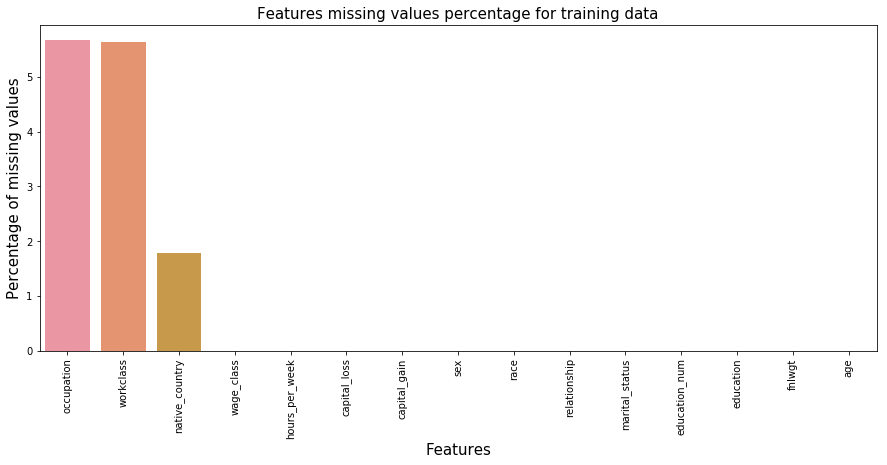

In [16]:
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Features missing values percentage for training data', fontsize=15)
missing_data.head()

#### Observation:

Since only 1% of values are missing for native country feature, we can drop the missing values.
Since more than 5% values are missing for workclass and occupation , we can impute the missing values with their mode values,
since they are categorical variables.

#### Dropping null values for training data:

In [17]:
train_set.dropna(inplace = True)

In [18]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

#### Observation:
There are no missing values.

#### Finding null values in test data

,Total,Percent
occupation,966,5.933296
workclass,963,5.914870
native_country,274,1.682943
wage_class,0,0.000000
hours_per_week,0,0.000000


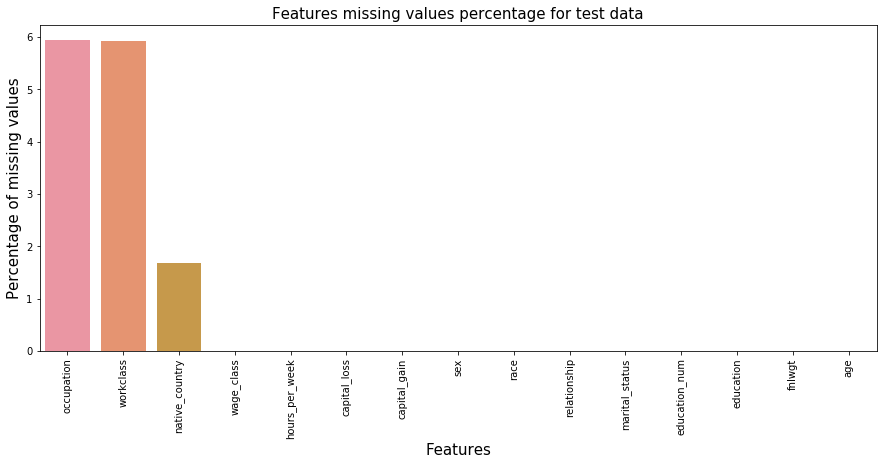

In [19]:
total = test_set.isnull().sum().sort_values(ascending=False)
percent = (test_set.isnull().sum()/test_set.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Features missing values percentage for test data', fontsize=15)
missing_data.head()

### Dropping null values in test data:

In [20]:
test_set.dropna( inplace = True)

In [21]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

### Data Visualization:

#### 1) Age vs Wage_class

C:\Users\Lenovo-Pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


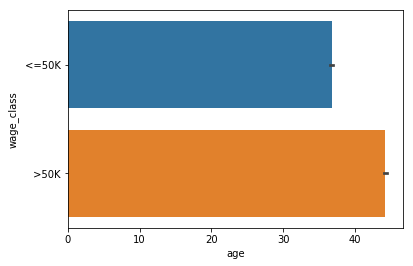

In [105]:
sns.barplot('age','wage_class', data = salary)

#### Observation:

People above 35, earn more than 50k.
As age increases, salary increases.

#### 2) Sex vs Wage_class

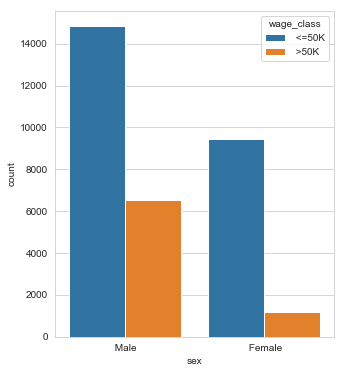

In [121]:
plt.figure(figsize=(5,6))
sns.countplot('sex',data=train_set,hue='wage_class')

#### Observation:

Male are seen to be earning more than women in both wage_classes.

#### 3) Education vs Wage_class

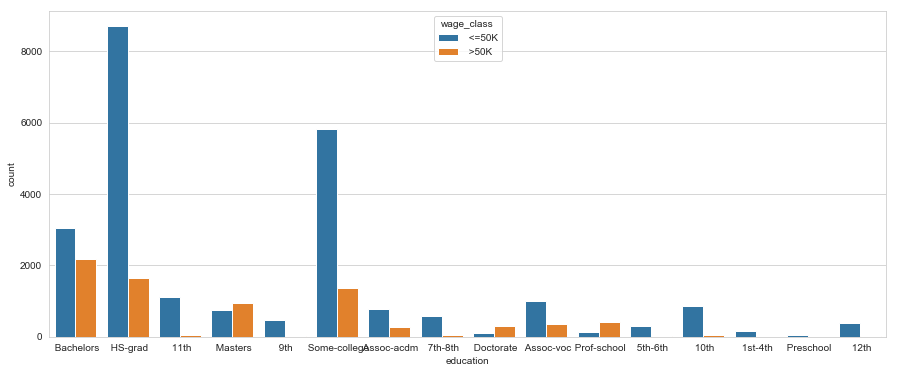

In [126]:
plt.figure(figsize=(15,6))
sns.countplot('education',data=train_set,hue='wage_class')

#### 4) Workclass vs Wage_class

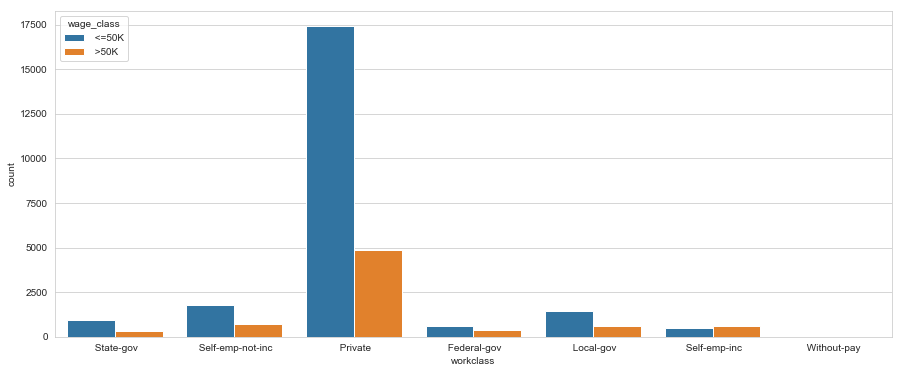

In [156]:
plt.figure(figsize=(15,6))
sns.countplot('workclass',data=train_set,hue='wage_class')

#### 5) Relationship vs Wage_class

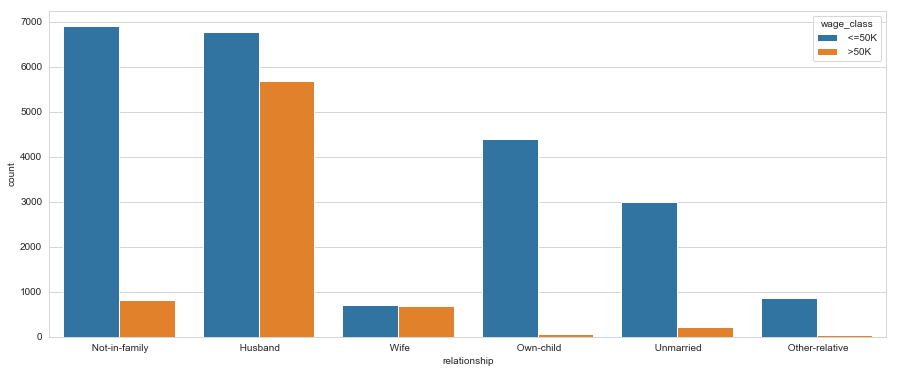

In [157]:
plt.figure(figsize=(15,6))
sns.countplot('relationship',data=train_set,hue='wage_class')

#### 6) Marital_status vs Wage_class

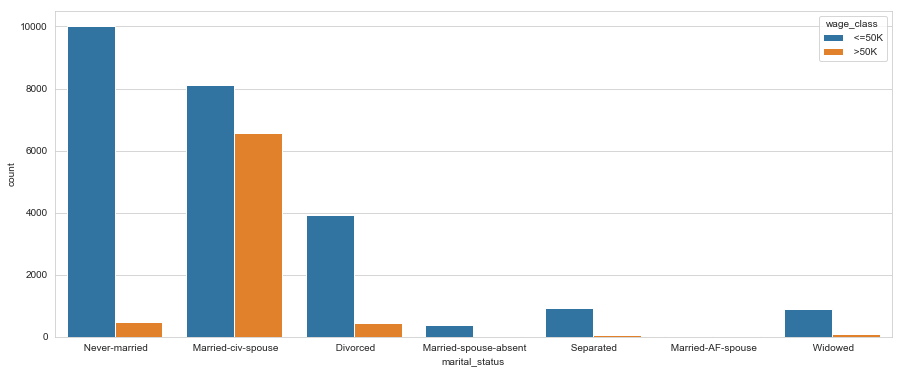

In [127]:
plt.figure(figsize=(15,6))
sns.countplot('marital_status',data=train_set,hue='wage_class')

#### 7) Race vs Wage_class

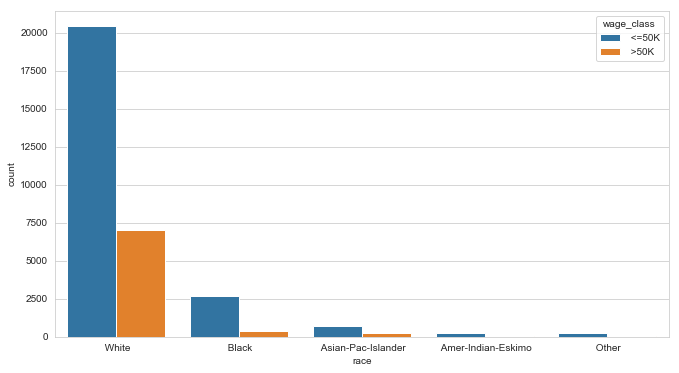

In [145]:
plt.figure(figsize=(11,6))
sns.countplot('race',data=train_set,hue='wage_class')

#### 8) Occupation vs Wage_class

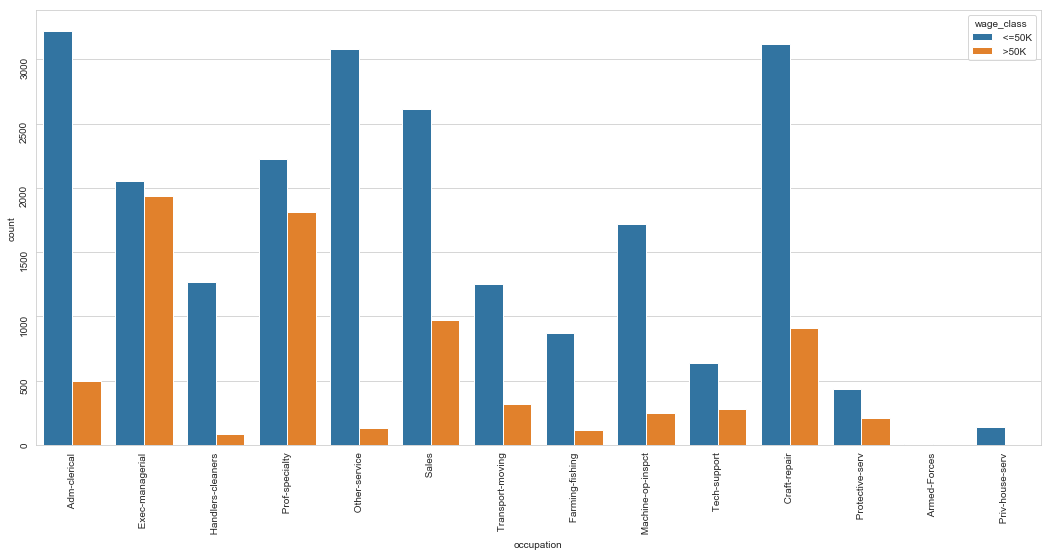

In [155]:
plt.figure(figsize=(18,8))
plt.tick_params(labelrotation = 90)
sns.countplot('occupation', data=train_set, hue='wage_class')

#### 9) Graph for continuous data

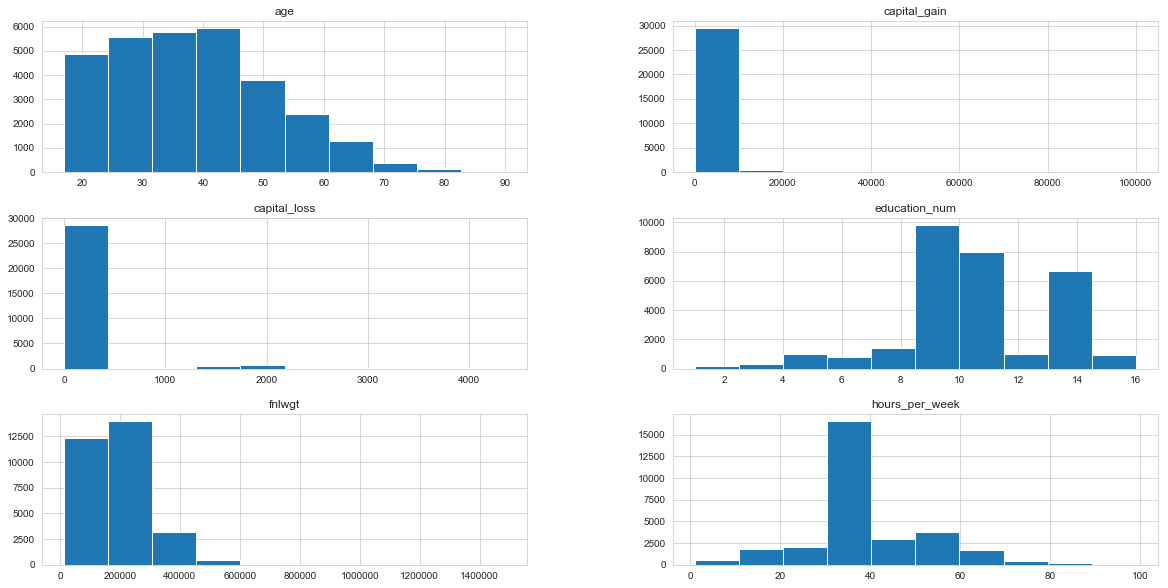

In [174]:
pd.DataFrame.hist(train_set, figsize=(20,10))
plt.show()

### Feature Encoding :

#### 1) workclass

In [22]:
label_quality = LabelEncoder()
train_set['workclass'] = label_quality.fit_transform(train_set['workclass'])
test_set['workclass'] = label_quality.fit_transform(test_set['workclass'])
print(train_set['workclass'].value_counts())
print(test_set['workclass'].value_counts())

2    22286
4     2499
1     2067
5     1279
3     1074
0      943
6       14
Name: workclass, dtype: int64
2    11021
4     1297
1     1033
5      667
3      572
0      463
6        7
Name: workclass, dtype: int64


#### 2) education

In [23]:
train_set['education'] = label_quality.fit_transform(train_set['education'])
test_set['education'] = label_quality.fit_transform(test_set['education'])
print(train_set['education'].value_counts())
print(test_set['education'].value_counts())

11    9840
15    6678
9     5044
12    1627
8     1307
1     1048
7     1008
0      820
5      557
14     542
6      455
2      377
10     375
4      288
3      151
13      45
Name: education, dtype: int64
11    4943
15    3221
9     2526
12     887
8      652
1      571
7      499
0      403
5      266
14     243
6      221
2      200
10     169
4      161
3       71
13      27
Name: education, dtype: int64


#### 3) marital_status

In [24]:
train_set['marital_status'] = label_quality.fit_transform(train_set['marital_status'])
test_set['marital_status'] = label_quality.fit_transform(test_set['marital_status'])
print(train_set['marital_status'].value_counts())
print(test_set['marital_status'].value_counts())

2    14065
4     9726
0     4214
5      939
6      827
3      370
1       21
Name: marital_status, dtype: int64
2    6990
4    4872
0    2083
5     472
6     450
3     182
1      11
Name: marital_status, dtype: int64


#### 4) occupation

In [25]:
train_set['occupation'] = label_quality.fit_transform(train_set['occupation'])
test_set['occupation'] = label_quality.fit_transform(test_set['occupation'])
print(train_set['occupation'].value_counts())
print(test_set['occupation'].value_counts())

9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1966
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: occupation, dtype: int64
3     1992
2     1990
9     1970
11    1824
0     1819
7     1596
6     1004
13     744
5      696
12     508
4      491
10     332
8       89
1        5
Name: occupation, dtype: int64


#### 5) relationship

In [26]:
train_set['relationship'] = label_quality.fit_transform(train_set['relationship'])
test_set['relationship'] = label_quality.fit_transform(test_set['relationship'])
print(train_set['relationship'].value_counts())
print(test_set['relationship'].value_counts())

0    12463
1     7726
3     4466
4     3212
5     1406
2      889
Name: relationship, dtype: int64
0    6203
1    3976
3    2160
4    1576
5     685
2     460
Name: relationship, dtype: int64


#### 6) race

In [27]:
train_set['race'] = label_quality.fit_transform(train_set['race'])
test_set['race'] = label_quality.fit_transform(test_set['race'])
print(train_set['race'].value_counts())
print(test_set['race'].value_counts())

4    25933
2     2817
1      895
0      286
3      231
Name: race, dtype: int64
4    12970
2     1411
1      408
0      149
3      122
Name: race, dtype: int64


#### 7) sex

In [28]:
train_set['sex'] = label_quality.fit_transform(train_set['sex'])
test_set['sex'] = label_quality.fit_transform(test_set['sex'])
print(train_set['sex'].value_counts())
print(test_set['sex'].value_counts())

1    20380
0     9782
Name: sex, dtype: int64
1    10147
0     4913
Name: sex, dtype: int64


#### 8) native country

In [29]:
train_set['native_country'] = label_quality.fit_transform(train_set['native_country'])
test_set['native_country'] = label_quality.fit_transform(test_set['native_country'])
print(train_set['native_country'].value_counts())
print(test_set['native_country'].value_counts())

38    27504
25      610
29      188
10      128
32      109
1       107
18      100
7       100
4        92
8        86
22       80
34       71
2        68
21       68
5        67
39       64
12       63
23       59
30       56
3        56
35       42
19       42
13       42
31       34
26       33
28       30
11       29
9        27
6        27
20       24
16       19
37       18
0        18
24       17
36       17
40       16
27       14
17       13
15       12
33       11
14        1
Name: native_country, dtype: int64
37    13788
24      293
28       95
31       66
10       65
1        56
17       47
7        47
2        45
4        41
8        33
20       32
5        30
33       30
22       30
30       28
13       27
3        26
29       25
12       23
21       23
11       20
38       19
6        16
27       15
25       15
18       14
34       13
35       12
19       12
15        9
9         9
32        9
0         8
26        8
36        8
14        7
39        7
16        5
23   

#### 9) wage_class

In [30]:
train_set['wage_class'] = label_quality.fit_transform(train_set['wage_class'])
test_set['wage_class'] = label_quality.fit_transform(test_set['wage_class'])
print(train_set['wage_class'].value_counts())
print(test_set['wage_class'].value_counts())

0    22654
1     7508
Name: wage_class, dtype: int64
0    11360
1     3700
Name: wage_class, dtype: int64


In [31]:
train_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [32]:
test_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


### Feature splitting


In [33]:
X_train = train_set.copy()
X_test = test_set.copy()
salary = train_set.append(test_set)
features = salary.drop('wage_class',axis = 1)
target = salary['wage_class']

In [34]:
y_train = X_train['wage_class']
X_train = X_train.drop('wage_class', axis=1)

y_test = X_test['wage_class']
X_test = X_test.drop('wage_class', axis=1)


In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(30162, 14) (30162,)
(15060, 14) (15060,)


## Logistic Regression Classifier

#### Building Model

In [36]:
model_accuracy = {}
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Prediction for test data

In [37]:
y_pred = logistic_classifier.predict(X_test)
y_pred_proba = logistic_classifier.predict_proba(X_test)

### Evaluation metrics

#### 1) Accuracy

In [38]:
print(metrics.accuracy_score(y_test, y_pred))
model_accuracy['Logistic Regression'] = metrics.accuracy_score(y_test, y_pred)

0.7847941567065073


#### 2) Confusion Matrix

In [39]:
confusion_matrix(y_test,y_pred)

array([[10696,   664],
       [ 2577,  1123]], dtype=int64)

#### 3) Classification report - precision, recall, f1-score

In [40]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.94      0.87     11360
          1       0.63      0.30      0.41      3700

avg / total       0.76      0.78      0.76     15060



#### 4) ROC curve

In [41]:
roc_curve(y_test, y_pred)

(array([0.       , 0.0584507, 1.       ]),
 array([0.        , 0.30351351, 1.        ]),
 array([2, 1, 0], dtype=int64))

#### 5) ROC-AUC score

In [42]:
roc_auc_score(y_test, y_pred)
model_accuracy['AUC_Logistic_Regression'] = roc_auc_score(y_test,y_pred_proba[:,1])


### 10-fold Cross Validation for Logistic Regression Model

In [43]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(estimator= LogisticRegression(),     
                X= features,  
                y = target,      
                scoring = "accuracy",                   
                cv=10)                              

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_accuracy['10 CV Score-Logistic Regression'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.78730931 0.78841477 0.78554057 0.79195224 0.78925254 0.78836798
 0.8003096  0.79102167 0.78588808 0.79451449]
Average accuracy:  0.7902571248490571


### Feature Selection for Logistic Regression

#### Recursive Feature Elimination(RFE)
RFE is used to select features by recursively considering smaller and smaller sets of features.
First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through
a coef_ attribute or through a featureimportances attribute. Then, the least important features are pruned from current
set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select 
is eventually reached.

In [44]:
from sklearn.feature_selection import RFE, RFECV
selector =  RFE(estimator=LogisticRegression(), step=1)
selector.fit(features,target)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [45]:
ranks = selector.ranking_.tolist()
ranks

[1, 1, 8, 3, 1, 1, 4, 1, 1, 1, 7, 6, 2, 5]

In [46]:
df_rank = pd.DataFrame({'Feature':features.columns,'Rank':ranks})
df_rank

,Feature,Rank
0,age,1
1,workclass,1
2,fnlwgt,8
3,education,3
4,education_num,1
5,marital_status,1
6,occupation,4
7,relationship,1
8,race,1
9,sex,1


#### RFECV- Recursive Feature Elimination with Cross Validation
RFECV is same as RFE, but also includes Cross-validation with it

In [47]:
selector =  RFECV(estimator=LogisticRegression(), step=1,cv=10)
selector.fit(features,target)
ranks = selector.ranking_.tolist()
df_rank_cv = pd.DataFrame({'Feature':features.columns,'Rank':ranks})
df_rank_cv

,Feature,Rank
0,age,1
1,workclass,1
2,fnlwgt,2
3,education,1
4,education_num,1
5,marital_status,1
6,occupation,1
7,relationship,1
8,race,1
9,sex,1


In [48]:
impcv= df_rank_cv.Feature[df_rank_cv.Rank == 1]
print("The important Features are :-\n",impcv.values)

The important Features are :-
 ['age' 'workclass' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country']


## Decision Tree Classifier  Model

In [49]:
dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#### Prediction for test data

In [50]:
y_pred = dec_tree.predict(X_test)
y_pred_proba = dec_tree.predict_proba(X_test)
print("accuracy of Decision Tree Classifier :",metrics.accuracy_score(y_test, y_pred))

accuracy of Decision Tree Classifier : 0.8027224435590969


In [103]:
model_accuracy['Decision Tree Classifier'] = accuracy_score(y_test, y_pred)

### Decision Tree modelling with different max-depth values

In [51]:
for depth in range(20):
    depth = depth + 1
    dec_tree = DecisionTreeClassifier(max_depth=depth,random_state=0)
    dec_tree.fit(X_train,y_train)
    y_pred = dec_tree.predict(X_test)
    y_pred_proba = dec_tree.predict_proba(X_test)
    print("accuracy of Decision Tree Classifier for max_depth ", depth," : ",metrics.accuracy_score(y_test, y_pred))

accuracy of Decision Tree Classifier for max_depth  1  :  0.7543160690571049
accuracy of Decision Tree Classifier for max_depth  2  :  0.8205179282868525
accuracy of Decision Tree Classifier for max_depth  3  :  0.8334661354581673
accuracy of Decision Tree Classifier for max_depth  4  :  0.8388446215139442
accuracy of Decision Tree Classifier for max_depth  5  :  0.8416998671978752
accuracy of Decision Tree Classifier for max_depth  6  :  0.8458167330677291
accuracy of Decision Tree Classifier for max_depth  7  :  0.849269588313413
accuracy of Decision Tree Classifier for max_depth  8  :  0.849003984063745
accuracy of Decision Tree Classifier for max_depth  9  :  0.849136786188579
accuracy of Decision Tree Classifier for max_depth  10  :  0.847808764940239
accuracy of Decision Tree Classifier for max_depth  11  :  0.8459495351925631
accuracy of Decision Tree Classifier for max_depth  12  :  0.8436918990703851
accuracy of Decision Tree Classifier for max_depth  13  :  0.8427622841965472

The Decision Tree Classifier with max_depth 9 gives maximum accuracy of 85%

In [52]:
dec_tree = DecisionTreeClassifier(max_depth=9,random_state=0)
dec_tree.fit(X_train,y_train)
y_pred = dec_tree.predict(X_test)
y_pred_proba = dec_tree.predict_proba(X_test)
print("accuracy of Decision Tree Classifier :",accuracy_score(y_test, y_pred))
model_accuracy['Accuracy Score of Decision Tree Classifier Model'] = accuracy_score(y_test, y_pred)
model_accuracy['AUC of Decision Tree Model Classifier - depth 9'] = roc_auc_score(y_test,y_pred_proba[:,1])

accuracy of Decision Tree Classifier : 0.849136786188579


### Evaluation metrics

#### 1) Confusion Matrix

In [53]:
confusion_matrix(y_test, y_pred)

array([[10773,   587],
       [ 1685,  2015]], dtype=int64)

#### 2) ROC_curve

In [54]:
roc_curve(y_test, y_pred)

(array([0.        , 0.05167254, 1.        ]),
 array([0.        , 0.54459459, 1.        ]),
 array([2, 1, 0], dtype=int64))

#### 3) ROC-AUC-Score

In [55]:
roc_auc_score(y_test, y_pred)

0.7464610296916635

#### 4) Classification report - precision, recall, f1-score

In [56]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.95      0.90     11360
          1       0.77      0.54      0.64      3700

avg / total       0.84      0.85      0.84     15060



### 10-fold Cross Validation for Decision Tree Classifier

In [57]:
scores = cross_val_score(estimator= DecisionTreeClassifier(random_state=0),     
                X= features,  
                y = target,      
                scoring = "accuracy",                   
                cv=10)                              

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
Cross Validation score:  [0.81052399 0.80057484 0.81185054 0.81782003 0.81402034 0.81711632
 0.8089341  0.81357806 0.80203495 0.78942712]
Average accuracy:  0.8085880294707005


### 10-fold cross validation with different max_depth values

In [105]:
for depth in range(20):
    depth = depth + 1
    scores = cross_val_score(estimator= DecisionTreeClassifier(max_depth=depth,random_state=0),     
                X= features,  
                y = target,     
                scoring = "accuracy",                  
                cv=10)                             

    
    print("Average accuracy for max_depth",depth," : ", scores.mean())

Average accuracy for max_depth 1  :  0.7521560352012255
Average accuracy for max_depth 2  :  0.8213038038398535
Average accuracy for max_depth 3  :  0.8351244473763509
Average accuracy for max_depth 4  :  0.8400557813180962
Average accuracy for max_depth 5  :  0.8477292061385331
Average accuracy for max_depth 6  :  0.8490115848581254
Average accuracy for max_depth 7  :  0.8514661043092865
Average accuracy for max_depth 8  :  0.8513111441481271
Average accuracy for max_depth 9  :  0.8495864930007395
Average accuracy for max_depth 10  :  0.8500509724721491
Average accuracy for max_depth 11  :  0.8486797753977088
Average accuracy for max_depth 12  :  0.8478172811035579
Average accuracy for max_depth 13  :  0.8473751211676028
Average accuracy for max_depth 14  :  0.8456502548410031
Average accuracy for max_depth 15  :  0.8434389710253043
Average accuracy for max_depth 16  :  0.8403652761085233
Average accuracy for max_depth 17  :  0.8368049044487436
Average accuracy for max_depth 18  :  0.

Cross-validation with max_depth 7 gives maximum accuracy of 85%

In [106]:
model_accuracy['Decision Tree 10-cv max depth'] = scores.mean()

### Feature selection using RFECV for Decision Tree Classifier

In [59]:
selector =  RFECV(estimator=DecisionTreeClassifier(max_depth=7,random_state=0), step=1,cv=10)
selector.fit(features,target)
ranks = selector.ranking_.tolist()
df_rank_cv = pd.DataFrame({'Feature':features.columns,'Rank':ranks})
df_rank_cv

,Feature,Rank
0,age,1
1,workclass,6
2,fnlwgt,7
3,education,4
4,education_num,1
5,marital_status,9
6,occupation,2
7,relationship,1
8,race,5
9,sex,8


In [60]:
impcvDT= df_rank_cv.Feature[df_rank_cv.Rank == 1]
print("The important Features  :-\n",impcvDT.values)

The important Features  :-
 ['age' 'education_num' 'relationship' 'capital_gain' 'capital_loss'
 'hours_per_week']


## K-Nearest Neighbour Classifier Model

In [61]:
from sklearn.neighbors import KNeighborsClassifier


In [62]:
k = []
scores = []
errors = []
for K in range(30):
    K_value = K+1
    k_neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    k_neigh.fit(X_train,y_train) 
    y_pred = k_neigh.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
    print("Error  is ", 100 - accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
    k.append(K_value)
    scores.append(accuracy_score(y_test,y_pred)*100)
    errors.append(1 - accuracy_score(y_test,y_pred) )

Accuracy is  72.02523240371846 % for K-Value: 1
Error  is  27.974767596281538 % for K-Value: 1
Accuracy is  77.68924302788844 % for K-Value: 2
Error  is  22.310756972111562 % for K-Value: 2
Accuracy is  75.18592297476759 % for K-Value: 3
Error  is  24.814077025232407 % for K-Value: 3
Accuracy is  78.32669322709164 % for K-Value: 4
Error  is  21.67330677290836 % for K-Value: 4
Accuracy is  76.78618857901726 % for K-Value: 5
Error  is  23.213811420982736 % for K-Value: 5
Accuracy is  78.47941567065074 % for K-Value: 6
Error  is  21.520584329349262 % for K-Value: 6
Accuracy is  77.64276228419654 % for K-Value: 7
Error  is  22.357237715803464 % for K-Value: 7
Accuracy is  78.78486055776892 % for K-Value: 8
Error  is  21.215139442231077 % for K-Value: 8
Accuracy is  78.32005312084993 % for K-Value: 9
Error  is  21.679946879150066 % for K-Value: 9
Accuracy is  79.06374501992032 % for K-Value: 10
Error  is  20.93625498007968 % for K-Value: 10
Accuracy is  78.59893758300133 % for K-Value: 11
E

In [63]:
max(scores)

79.62151394422311

The accuracy is maximum for K-value 25 with 80% value.

### K-value vs Accuracy :

Text(0.5,1,'K Value vs Accuracy')

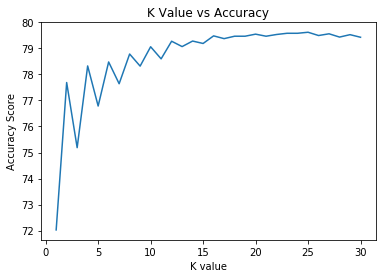

In [64]:
plt.plot(k,scores)
plt.xlabel('K value')
plt.ylabel('Accuracy Score')
plt.title('K Value vs Accuracy')

#### Observation:
    
    The accuracy increases with increase in K-value and remains constant after K-value increases to 20.

### K-value vs Error

Text(0.5,1,'K Value vs errors')

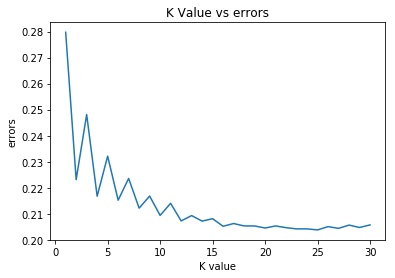

In [65]:
plt.plot(k,errors)
plt.xlabel('K value')
plt.ylabel('errors')
plt.title('K Value vs errors')

#### Observation:

Error decreases with increase with K-value and remains constant after K-value =20

In [66]:
knn = KNeighborsClassifier(n_neighbors = 20, weights='uniform', algorithm='auto')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)
# generate evaluation metrics
print("accuracy of KNN Classifier :",metrics.accuracy_score(y_test, y_pred))
model_accuracy['Accuracy Score of KNN Classifier neigbors-20'] = accuracy_score(y_test, y_pred)

model_accuracy['AUC of KNN Classifier neighbors-20'] = roc_auc_score(y_test,y_pred_proba[:,1])

accuracy of KNN Classifier : 0.795484727755644


### Evaluation metrics:


#### 1) Confusion matrix

In [67]:
confusion_matrix(y_test, y_pred)

array([[11204,   156],
       [ 2924,   776]], dtype=int64)

#### 2) ROC_AUC_Score

In [68]:
roc_auc_score(y_test, y_pred)

0.5979986676817663

#### 3) ROC_curve

In [69]:
roc_curve(y_test, y_pred)

(array([0.        , 0.01373239, 1.        ]),
 array([0.        , 0.20972973, 1.        ]),
 array([2, 1, 0], dtype=int64))

#### 4) Classification report

In [70]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.99      0.88     11360
          1       0.83      0.21      0.34      3700

avg / total       0.80      0.80      0.75     15060



## 10-fold Cross Validation with KNN

In [71]:
scores = cross_val_score(estimator= KNeighborsClassifier(n_neighbors = 20, weights='uniform', algorithm='auto'),     
                X= features,  
                y = target,      
                scoring = "accuracy",                   
                cv=10)                             

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_accuracy['10 CV Score-KNN Classifier neighbors-20'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.79305771 0.79394207 0.7988061  0.79460535 0.79256966 0.79389651
 0.79876161 0.79301194 0.79119664 0.79340854]
Average accuracy:  0.7943256124268987


## Ensemble methods - Bagging method

### Bagging with Logistic Regression

In [72]:
from sklearn.ensemble import BaggingClassifier
bag_LR = BaggingClassifier(LogisticRegression(),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3) 

bag_LR.fit(X_train,y_train)


bag_preds = bag_LR.predict(X_test)
print("Predictions : ",bag_preds)

bag_preds_proba = bag_LR.predict_proba(X_test)
print("Prediction Probabilities : ",bag_preds_proba)




Predictions :  [0 0 0 ... 0 1 0]
Prediction Probabilities :  [[0.85459209 0.14540791]
 [0.74423237 0.25576763]
 [0.84532674 0.15467326]
 ...
 [0.81331636 0.18668364]
 [0.30294891 0.69705109]
 [0.73088392 0.26911608]]


### Evaluation Metrics

#### 1) Accuracy score

In [73]:
print(bag_LR.score(X_test,y_test))
print("Accuracy Score of Bagging for single Logistic Regression Model :",accuracy_score(y_test,bag_preds))

0.7889110225763613
Accuracy Score of Bagging for single Logistic Regression Model : 0.7889110225763613


#### 2) Confusion Matrix

In [74]:
confusion_matrix(y_test, bag_preds)

array([[10763,   597],
       [ 2582,  1118]], dtype=int64)

#### 3) ROC_AUC_Score

In [75]:
roc_auc_score(y_test, y_pred)

0.5979986676817663

#### 4) ROC_Curve

In [76]:
roc_curve(y_test, y_pred)

(array([0.        , 0.01373239, 1.        ]),
 array([0.        , 0.20972973, 1.        ]),
 array([2, 1, 0], dtype=int64))

#### 5) Classification Report

In [77]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.99      0.88     11360
          1       0.83      0.21      0.34      3700

avg / total       0.80      0.80      0.75     15060



### Bagging with KNN model

In [107]:
bag_KNN = BaggingClassifier(KNeighborsClassifier(n_neighbors = 20, weights='uniform', algorithm='auto'),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3) 

bag_KNN.fit(X_train,y_train)


bag_preds = bag_KNN.predict(X_test)
print("Predictions : ",bag_preds)

bag_preds_proba = bag_KNN.predict_proba(X_test)
print("Prediction Probabilities : ",bag_preds_proba)



Predictions :  [0 0 0 ... 0 0 0]
Prediction Probabilities :  [[0.505 0.495]
 [0.765 0.235]
 [0.845 0.155]
 ...
 [0.875 0.125]
 [0.655 0.345]
 [0.905 0.095]]


### Evaluation Metrics

#### 1) Accuracy Score

In [108]:
bag_KNN.score(X_test,y_test)
print("Accuracy Score of Bagging for single KNN Model :",accuracy_score(y_test,bag_preds))
model_accuracy['Bagging for single KNN Model'] = accuracy_score(y_test, bag_preds)

Accuracy Score of Bagging for single KNN Model : 0.7919654714475431


#### 2) Confusion Matrix

In [80]:
confusion_matrix(y_test,bag_preds)

array([[11260,   100],
       [ 3033,   667]], dtype=int64)

#### 3) ROC_AUC_Score

In [81]:
roc_auc_score(y_test, y_pred)

0.5979986676817663

#### 4) ROC_Curve

In [334]:
roc_curve(y_test, y_pred)

(array([0.        , 0.01373239, 1.        ]),
 array([0.        , 0.20972973, 1.        ]),
 array([2, 1, 0], dtype=int64))

#### 5) Classification report

In [82]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.99      0.88     11360
          1       0.83      0.21      0.34      3700

avg / total       0.80      0.80      0.75     15060



In [83]:
model_accuracy['Accuracy Score-Bagging-KNN neighbors -20'] = accuracy_score(y_test,bag_preds)
model_accuracy['AUC-Bagging-KNN neighbors -20'] = roc_auc_score(y_test,bag_preds_proba[:,1])


## Random Forest Model

In [84]:
from sklearn.ensemble import  RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
y_pred_proba = RF.predict_proba(X_test)
print("accuracy of Random Forest Classifier :",accuracy_score(y_test, y_pred))
model_accuracy['Accuracy score of Random Forest Classifier'] = accuracy_score(y_test, y_pred)

accuracy of Random Forest Classifier : 0.8438247011952191


### Evaluation Metrics

#### 1) Confusion Matrix

In [85]:
confusion_matrix(y_test, y_pred)

array([[10594,   766],
       [ 1586,  2114]], dtype=int64)

#### 2) ROC_AUC_Score

In [86]:
roc_auc_score(y_test, y_pred)

0.7519608869432814

#### 3) ROC_Curve

In [87]:
roc_curve(y_test, y_pred)

(array([0.        , 0.06742958, 1.        ]),
 array([0.        , 0.57135135, 1.        ]),
 array([2, 1, 0], dtype=int64))

#### 4) Classification report

In [88]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90     11360
          1       0.73      0.57      0.64      3700

avg / total       0.84      0.84      0.84     15060



### RFECV Feature Selection for Random Forest

In [89]:
selector =  RFECV(estimator=RandomForestClassifier(), step=1,cv=10)
selector.fit(features, target)
ranks = selector.ranking_.tolist()
df_rank_cv = pd.DataFrame({'Feature':features.columns,'Rank':ranks})
df_rank_cv

,Feature,Rank
0,age,1
1,workclass,1
2,fnlwgt,1
3,education,1
4,education_num,1
5,marital_status,1
6,occupation,1
7,relationship,1
8,race,1
9,sex,2


In [90]:
impcvRF= df_rank_cv.Feature[df_rank_cv.Rank == 1]
print("The important Features :-\n",impcvRF.values)

The important Features :-
 ['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country']


### 10 fold Cross Validation for Random Forest

In [91]:
scores = cross_val_score(estimator= RandomForestClassifier(),     
                X= features,  
                y = target,      
                scoring = "accuracy",                   
                cv=10)                              

print("Accuracy per fold: ")
print("Cross Validation score: ", scores)
print("Average accuracy: ", scores.mean())
model_accuracy['10 CV Score-Random Forest Classifier'] = scores.mean()

Accuracy per fold: 
Cross Validation score:  [0.84501437 0.84457219 0.84545656 0.85142604 0.85537373 0.85095091
 0.8460858  0.84431667 0.83742535 0.8540146 ]
Average accuracy:  0.8474636216450525


## Boosting for Random Forest Classifier

In [109]:
from xgboost.sklearn import XGBClassifier
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 5
}
params['eval_metric'] = ['logloss', 'auc']

In [110]:
bst = XGBClassifier(**params).fit(X_train,y_train)

In [111]:
preds = bst.predict(X_test)
preds

C:\Users\Lenovo-Pc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [112]:
preds_proba = bst.predict_proba(X_test)
preds_proba

array([[0.99046105, 0.00953897],
       [0.63109004, 0.36890996],
       [0.9000863 , 0.09991371],
       ...,
       [0.16005623, 0.83994377],
       [0.6858711 , 0.31412885],
       [0.23847127, 0.76152873]], dtype=float32)

#### 1) Accuracy score

In [113]:
accuracy_score(y_test, preds)
model_accuracy['Accuracy score for XGBoost'] = metrics.accuracy_score(y_test, y_pred)

#### 2) ROC_AUC_Score

In [97]:
roc_auc_score(y_test, preds)

0.7538396935668064

#### 3) ROC_Curve

In [98]:
roc_curve(y_test, preds)

(array([0.        , 0.07015845, 1.        ]),
 array([0.        , 0.57783784, 1.        ]),
 array([2, 1, 0], dtype=int64))

#### 4) Classification Report

In [99]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90     11360
          1       0.73      0.58      0.64      3700

avg / total       0.84      0.84      0.84     15060



In [100]:
model_accuracy['AUC for XGBOOST model'] = roc_auc_score(y_test,preds_proba[:,1])

In [114]:
features_final = []
scores = []
for k,v in model_accuracy.items():
    features_final.append(k)
    scores.append(v)

## Performance Comparison:

In [117]:
df_scores = pd.DataFrame({'Features':features_final,'Scores':scores})
feat_cols = ['Features','Scores']
df_scores = df_scores[feat_cols]
df_scores.sort_values(by='Scores',ascending= False)

,Features,Scores
4,AUC of Decision Tree Model Classifier - depth 9,0.893669
12,AUC for XGBOOST model,0.890331
3,Accuracy Score of Decision Tree Classifier Model,0.849137
11,10 CV Score-Random Forest Classifier,0.847464
16,Accuracy score for XGBoost,0.843825
13,Decision Tree Classifier,0.843825
10,Accuracy score of Random Forest Classifier,0.843825
14,Decision Tree 10-cv max depth,0.826456
5,Accuracy Score of KNN Classifier neigbors-20,0.795485
7,10 CV Score-KNN Classifier neighbors-20,0.794326


## Conclusion:

#### 1) Problem 2 : Factors important
    
Logistic Regression -   ['age' 'workclass' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country']

Decision Tree - ['age' 'education_num' 'relationship' 'capital_gain' 'capital_loss'
 'hours_per_week']

Random Forest - ['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country']

#### 2) Problem 3 : Best Algorithms

From performance comparison , we find

1) Decision Tree 

2) XGBoost 

3) Random Forest

perform higher than other algorithms with maximum accuracy and AUC score.
